In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import product
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

### Read Data and Split into test and train

In [50]:
data = pd.read_csv('../../Finalized Data/final_with_race.csv')

In [ ]:
data.shape

In [ ]:
data.head()

In [3]:
sum(data.Y[data.Y==1])/data.shape[0]

0.25689713896457766

In [52]:
data.drop(['File','days_jail_doc','Unnamed: 0', 'Unanimous'],axis=1,inplace=True)

In [ ]:
data.columns.values

In [53]:
y = data.pop('Y')

In [54]:
X = data

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(X.dtypes)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

### Build initial model for testing

In [56]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate =0.1 )
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [57]:
forecast = model.predict_proba(X_test)[:,1]

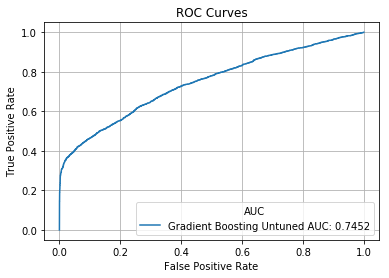

In [58]:
plot_roc(y_test, forecast,'Gradient Boosting Untuned')
plt.show()

In [19]:
def plot_roc(actual,forecast,name):
    
    #ROC
    fpr, tpr, thresholds = metrics.roc_curve(actual, forecast)

    #AUC
    aucc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = name + ' AUC: '+str(round(aucc, 4)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.grid(True)
    plt.legend(loc = 'lower right', title='AUC')

In [39]:
def show_most_informative_features(model, names, n=20):
    feature_names = names
    coefs = model.feature_importances_
    coefs_with_fns = sorted(zip(coefs, feature_names),reverse=True)
    top = coefs_with_fns[:n]
    for (coef_1, fn_1) in top:
        
        print("\t%.4f\t%-15s\t" % (coef_1, fn_1))

### Fine Tuning

In [74]:
#Grid search
param_grid = [
    {'n_estimators' : [100,200],
     'learning_rate': [0.1, 0.05],
      'max_depth': [5],
      'min_samples_split': [10,20]}  
]

In [75]:
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, scoring= 'roc_auc')

In [76]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05], 'max_depth': [5], 'min_samples_split': [10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [77]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 20,
 'n_estimators': 100}

In [78]:
best_gbt = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=100)

In [79]:
best_gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=20, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [80]:
forecast = best_gbt.predict_proba(X_test)[:,1]

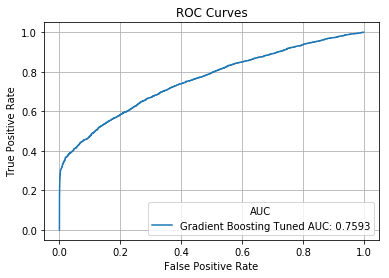

In [81]:
plot_roc(y_test, forecast,'Gradient Boosting Tuned')
plt.show()

In [82]:
show_most_informative_features(best_gbt, X_train.columns.values)

	0.0892	judge_info_missing	
	0.0744	Gap_days       	
	0.0472	unanimous      	
	0.0449	api            	
	0.0340	hispanic       	
	0.0329	white          	
	0.0277	black          	
	0.0269	start year     	
	0.0220	type_crime_nan 	
	0.0206	years_from_trial	
	0.0205	FirstD_month_x 	
	0.0191	a_Friday       	
	0.0186	appellant      	
	0.0162	degree_crime_nan	
	0.0122	AppealD_month_x	
	0.0118	a_Thursday     	
	0.0081	a_Wednesday    	
	0.0080	defense__nan   	
	0.0076	da_2011-contested	
	0.0074	defense__public defender	
